## Classification on Yelp data using Machine Learning Techniques
### By Vishnupriya Venkateswaran
### 11-27-2018



### While building a model we follow these steps as below:

#### Step 1: Exploratory Data Analysis on the datasets used.
#### Step 2: Visually respresnt the data and find correlation between variables
#### Step 3: Divide the data into training and testing sets
#### Step 4: Standardize the features and target
#### Step 5: Train the model on the training data
#### Step 6: Test the model on the testing data
#### Step 7: Get the accuracy of the models
#### Step 8: Find the winning model


In [1]:
#import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data

df = pd.read_csv('restaurants_data.csv')
df.head()

#Here we are loading the preprocessed and cleaned restaurants data

,Unnamed: 0,business_id,review_count,stars,checkin_count,city,state,categories
0,1,mLwM-h2YhXl2NCgdS84_Bw,0.000143,4,0.000040,127,23,"[u'Food', u'Soul Food', u'Convenience Stores',..."
1,3,duHFBe87uNSXImQmvBh87Q,0.001003,4,0.000403,618,5,"[u'Sandwiches', u'Restaurants']"
2,13,SDMRxmcKPNt1AHPBKqO64Q,0.002580,2,0.000489,427,23,"[u'Burgers', u'Bars', u'Restaurants', u'Sports..."
3,14,iFEiMJoEqyB9O8OUNSdLzA,0.000000,3,0.000024,804,23,"[u'Chinese', u'Restaurants']"
4,19,HmI9nhgOkrXlUr6KZGZZew,0.001720,3,0.000174,632,33,"[u'Sandwiches', u'Restaurants', u'Italian', u'..."


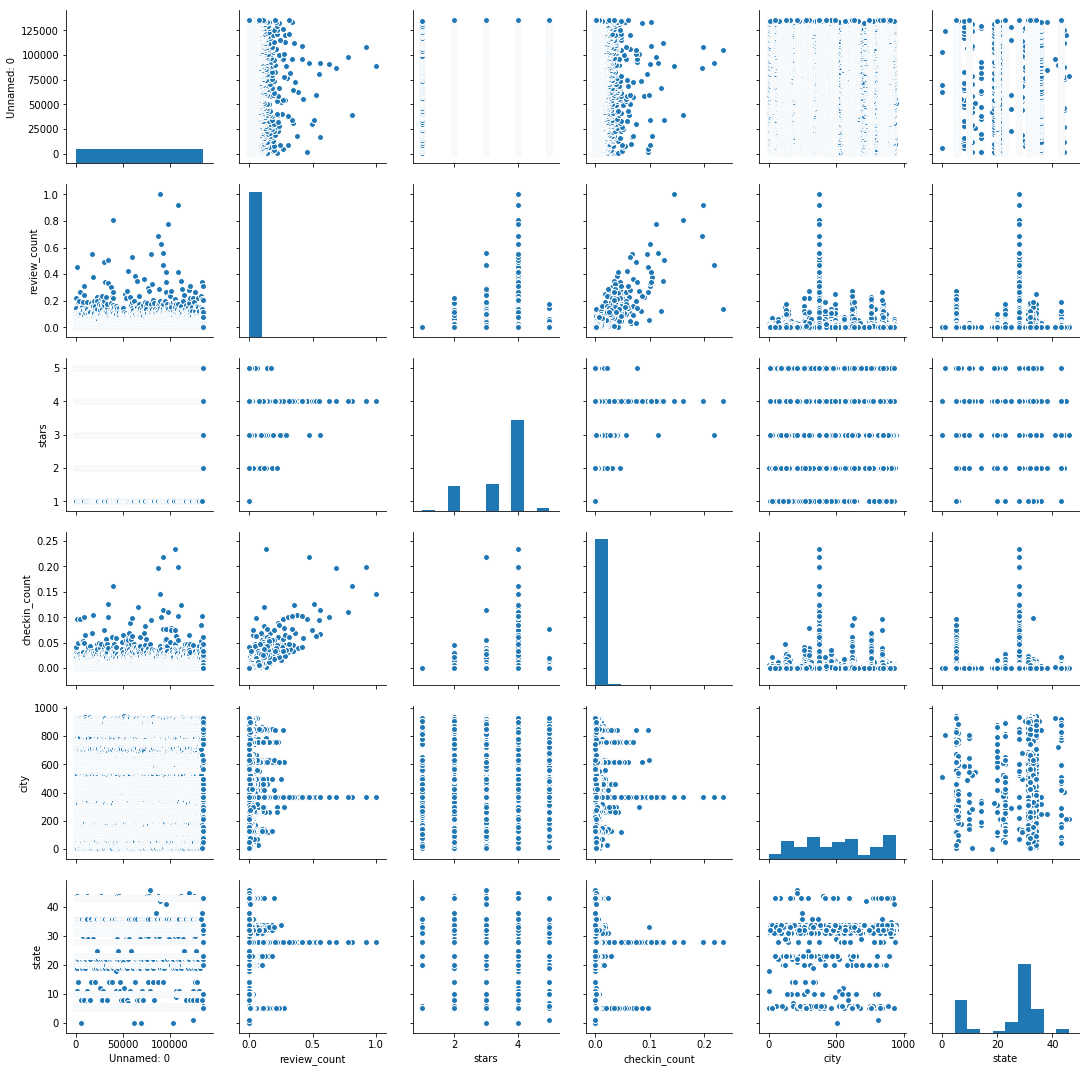

In [3]:
#Pair plot to visually understand the variables
import seaborn as sns
sns.pairplot(df)
plt.show()

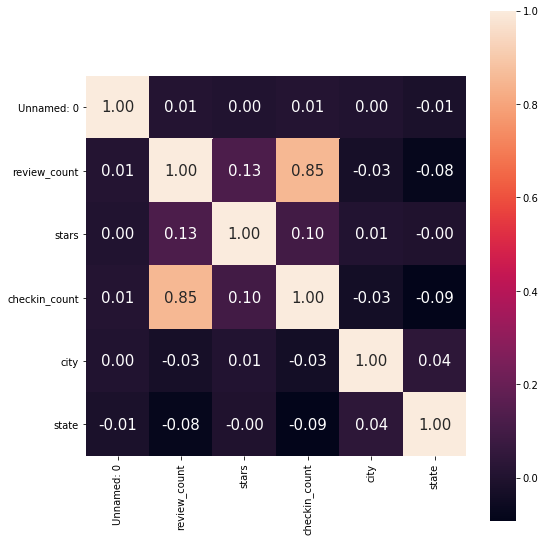

In [4]:
# Find correlation between variables using correlation heat map

import seaborn as sns
corr = df.corr()
plt.figure(figsize=(8,8))
#Declare the heat map
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=corr.columns.values,
                 xticklabels=corr.columns.values)

# Show heat map
plt.tight_layout()
plt.show()

In [5]:
#Determine features and target

X = df[['review_count', 'checkin_count', 'city', 'state']]
y = df[['stars']]

In [6]:
#Standardize the features 

from sklearn.preprocessing import StandardScaler

# Declare the standard scaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(X)

In [7]:
# Now we divide the data into training and test data

from sklearn.model_selection import train_test_split

# Randomly choose 25% of the data for testing (set randome_state as 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### To find best model, I have used differnt classification models. The differnet models used are:

## Logistic Regression
## Desicion Trees
## Random Forest
## Neural Networks
## Support Vector Machine

### Hypertuning is used to get the best performance measure of each model.

In [8]:
#1. Logistic Regression

#Import logistic regression from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')
    
#To calculate run time
import time
t = time.clock()

# Declare LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

print("Logistic Regression")

#Predict values for test data
y_pred = logit.predict(X_test)

#Calculate Accuracy, Precision score and Recall
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred, average='weighted'))
print('Recall:',recall_score(y_test, y_pred, average='weighted'))

#Calculate run time
run_time = time.clock() - t
print('Logistic Regression run in %.3f s' % run_time)

Logistic Regression
Accuracy: 0.6130677677920816
Precision: 0.3758520879055657
Recall: 0.6130677677920816
Logistic Regression run in 0.200 s


In [9]:
#HyperParameter Tuning using GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
C_range = [10 ** i for i in range(-4, 5)]

#param_grid: Contains various parameters to pass to the GridSearchCV
param_grid = [{'multi_class': ['ovr'], 
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'C': C_range},
              {'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'C': C_range}]

# Declare a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.0001, 'multi_class': 'ovr', 'solver': 'newton-cg'}
Best score is 0.6185859158350707


In [10]:
#2.Decision Tree

from sklearn import tree

#Start time to calculate the run time 
start_time = time.time()

# Declare DecisionTreeClassifier
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

print("Decision Tree")

#Predict values
y_predict = model_tree.predict(X_test)

#Calculate Accuracy, Precision score and Recall
print('Accuracy score:',accuracy_score(y_test, y_predict))
print('Precision score:',precision_score(y_test, y_predict, average='weighted'))
print('Recall score:',recall_score(y_test, y_predict, average='weighted'))

end_time = time.time()
print('Decision Tree run in ' + str(end_time - start_time))

Decision Tree
Accuracy score: 0.4795563112298599
Precision score: 0.47981253896186166
Recall score: 0.4795563112298599
Decision Tree run in 0.09888195991516113


In [11]:
#Since the accuracy is not that good, we can tweek the parameters to see if we can make the model perform better
#here we can have max depth of the tree as 5.

start_time = time.time()

#Declare Decision Tree with max_depth 5
model = tree.DecisionTreeClassifier(max_depth=5,presort='true')

model.fit(X_train, y_train)

print('Decision Tree with max_dept 5 ')
y_predict = model.predict(X_test)

print('Accuracy score:',accuracy_score(y_test, y_predict))
print('Precision score:',precision_score(y_test, y_predict, average='weighted'))
print('Recall score:',recall_score(y_test, y_predict, average='weighted'))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

print(cm)

end_time = time.time()

# Print the Run time
print('Decision Tree Run time: ' + str(end_time - start_time))

#The accuracy increases but the precision value decreases.

Decision Tree with max_dept 5 
Accuracy score: 0.6143632094567242
Precision score: 0.45161352326628873
Recall score: 0.6143632094567242
[[   0    6    0   66    0]
 [   0  107    0 1993    0]
 [   0   47    0 2252    0]
 [   0   88    3 7481    0]
 [   0    3    0  305    0]]
Decision Tree Run time: 0.04369091987609863


In [12]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "min_samples_split": [2, 10, 30],
              "min_samples_leaf": [1, 10, 30],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the GridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.6185859158350707


In [13]:
#3.Random Forest
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
#Declare RandomForestClassifier with required parameters
forest = RandomForestClassifier(n_estimators=400, max_depth=11, random_state=0,max_features=4,min_samples_split=100,min_samples_leaf=1,criterion='gini')
forest.fit(X_train, y_train)

print('Random Forest ')

#Predict values
y_pred_forest = forest.predict(X_test)

#Calculate Accuracy, Precision score and Recall
print('Accuracy score:',accuracy_score(y_test, y_pred_forest))
print('Precision score:',precision_score(y_test, y_pred_forest, average='weighted'))
print('Recall score:',recall_score(y_test, y_pred_forest, average='weighted'))

end_time = time.time()

# Print the Run time
print('Random Forest Run time: ' + str(end_time - start_time))

Random Forest 
Accuracy score: 0.6162254068496478
Precision score: 0.5080594944307212
Recall score: 0.6162254068496478
Random Forest Run time: 14.580873966217041


In [14]:
# Import necessary modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'n_estimators': [2, 10, 30],
              'min_samples_split': [2, 10, 30],
              'min_samples_leaf': [1, 10, 30]}

# Instantiate a Random Forest Classifier: 
rand_forest = RandomForestClassifier()

# Instantiate the GridSearchCV object: 
rand_forest_cv = GridSearchCV(rand_forest, param_dist, cv=4)

# Fit it to the data
rand_forest_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rand_forest_cv.best_params_))
print("Best score is {}".format(rand_forest_cv.best_score_))

Tuned Random Forest Parameters: {'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 30}
Best score is 0.6200433172074571


In [15]:
#Now to compare Decision Tree and Random Forest
#As Done in class

# Comparing Decision Trees and Randomn Forest

from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        
        
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
   
    return clf.score(X_test, y_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    accuracies.append(train_test_evaluate(classifier))
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)

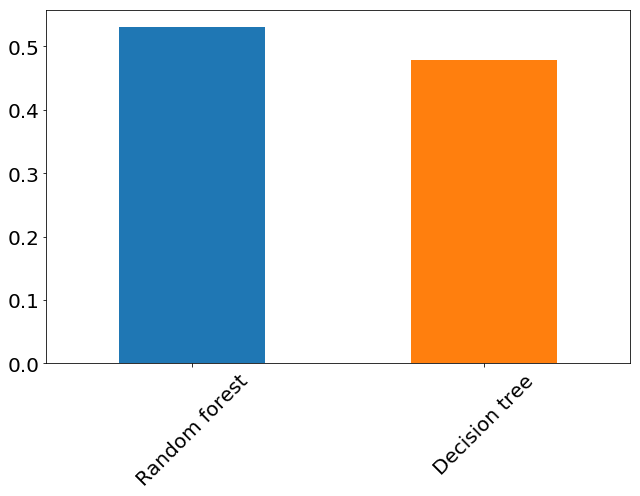

In [17]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Decision tree', 'Random forest'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar Plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Fscores', kind='bar', figsize=(9,7), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
#4. Perceptron

from sklearn.linear_model import Perceptron

start_time = time.time()
#Declare the Model
sklearn_perceptron = Perceptron(n_iter=3,random_state=0)

# Train the model
sklearn_perceptron.fit(X_train, y_train)

#Predict values
y_pred_perceptron = sklearn_perceptron.predict(X_test)

# Print the accuracy,precision and recall
print('Accuracy score:',accuracy_score(y_test, y_pred_perceptron))
print('Precision score:',precision_score(y_test, y_pred_perceptron, average='weighted'))
print('Recall score:',recall_score(y_test, y_pred_perceptron, average='weighted'))

end_time = time.time()

# Print the Run time
print('Run time for Perceptron: ' + str(end_time - start_time))

Accuracy score: 0.5020646101530241
Precision score: 0.47130909729904963
Recall score: 0.5020646101530241
Run time for Perceptron: 0.052275896072387695


In [19]:
#5. Support Vector Machine

import time
from sklearn.metrics import accuracy_score
from sklearn import svm

t = time.clock()

#Declare the classifier as SVM
clf = svm.SVC()
clf.fit(X, y)

#Predict values
y_predict_svm = clf.predict(X_test)

# Print the accuracy,precision and recall
print('Accuracy score:',accuracy_score(y_test, y_predict_svm))
print('Precision score:',precision_score(y_test, y_predict_svm, average='weighted'))
print('Recall score:',recall_score(y_test, y_predict_svm, average='weighted'))

run_time = time.clock() - t
print('SVM run in %.3f s' % run_time)

Accuracy score: 0.6131487328961218
Precision score: 0.5620212954613323
Recall score: 0.6131487328961218
SVM run in 63.996 s


In [20]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

t0 = time.clock()

#Declare classifier with parameter gamma=500 and c=1
clf = svm.SVC(gamma=500, C=1)

#Fit the classifier
clf.fit(X, y)

#Predict the values
y_predict = clf.predict(X_test)

#Calculate and print accuracy,precision and recall
print('Accuracy score:',accuracy_score(y_test, y_predict))
print('Precision score:',precision_score(y_test, y_predict, average='weighted'))
print('Recall score:',recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('SVC with gamma 500 and C=1 in %.3f s' % run_time)

Accuracy score: 0.6560602380374059
Precision score: 0.684710350188276
Recall score: 0.6560602380374059
SVC with gamma 500 and C=1 in 245.757 s


In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Declare time clock
t = time.clock()

#Declare classifier with gamma as 40000 and c as 10
clf = svm.SVC(gamma=40000, C=10)

#Fit the model
clf.fit(X, y)

#Predict values
y_predict = clf.predict(X_test)

#Calculate and print accuracy, precision and recall
print('Accuracy score:',accuracy_score(y_test, y_predict))
print('Precision score:',precision_score(y_test, y_predict, average='weighted'))
print('Recall score:',recall_score(y_test, y_predict, average='weighted'))

#Calculate run time and print it
run_time = time.clock() - t
print('SVC with gamma 40000 and C=10 in %.3f s' % run_time)

Accuracy score: 0.8682697757266619
Precision score: 0.8726456025461231
Recall score: 0.8682697757266619
SVC with gamma 40000 and C=10 in 296.837 s


#### Used the SVM classifier with gamma as 40000 and c as 1 and got the following output.
#### Accuracy : 0.816856934661161
#### Precision : 0.8376901898345999
#### Recall : 0.816856934661161
#### RunTime  : 232.775 s

#### Since this takes a lot of time to run I have commented it as the accuracy decreases.

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Declare time clock
#t = time.clock()

#Declare classifier with gamma as 40000 and c as 1
#clf = svm.SVC(gamma=40000, C=1)

#Fit the model
#clf.fit(X, y)

#Predict values
#y_predict = clf.predict(X_test)

##Calculate and print accuracy, precision and recall
#print('Accuracy score:',accuracy_score(y_test, y_predict))
#print('Precision score:',precision_score(y_test, y_predict, average='weighted'))
#print('Recall score:',recall_score(y_test, y_predict, average='weighted'))

#Calculate run time and print it
#run_time = time.clock() - t
#print('SVC with gamma 40000 and C=1 in %.3f s' % run_time)

## Conclusion

#### The cleaned data is used to build various models to predict the star ratings on the Yelp dataset. 
#### For each model the accurary, precision, recall and runtime are calculated.
#### On comparing different models, Support Vector Machine is the winning model with accuracy of 86.8% when run with paramaters gamma set to 40000 and c to 10.
#### This model can be used to predict star ratings of millions of resuturants on Yelp.